In [1]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# show options expirations
msft.options

('2024-11-08',
 '2024-11-15',
 '2024-11-22',
 '2024-11-29',
 '2024-12-06',
 '2024-12-13',
 '2024-12-20',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-05-16',
 '2025-06-20',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [3]:
# get option chain for specific expiration
opt = msft.option_chain('2024-12-13')
# data available via: opt.calls, opt.puts

In [4]:
opt

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   MSFT241213C00340000 2024-11-04 17:28:40+00:00   340.0      69.05  80.55   
1   MSFT241213C00365000 2024-11-06 14:59:00+00:00   365.0      54.77  56.25   
2   MSFT241213C00370000 2024-11-01 16:49:45+00:00   370.0      47.30  51.10   
3   MSFT241213C00375000 2024-11-04 20:32:31+00:00   375.0      36.50  46.40   
4   MSFT241213C00380000 2024-11-06 19:02:44+00:00   380.0      41.07  41.75   
5   MSFT241213C00385000 2024-11-05 19:59:32+00:00   385.0      31.20  37.20   
6   MSFT241213C00390000 2024-11-06 14:47:07+00:00   390.0      30.82  32.90   
7   MSFT241213C00395000 2024-11-06 19:02:34+00:00   395.0      27.79  28.35   
8   MSFT241213C00400000 2024-11-06 18:48:18+00:00   400.0      23.60  24.25   
9   MSFT241213C00405000 2024-11-06 20:02:25+00:00   405.0      20.52  20.35   
10  MSFT241213C00410000 2024-11-06 20:02:25+00:00   410.0      16.94  16.80   
11  MSFT241213C00415000 2024-11-06 19:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import numpy as np

# Setting up plot style
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12, 6)

# Load option chain for specific date (from previous cell)
calls = opt.calls
puts = opt.puts

In [6]:
# Convert lastTradeDate to datetime if needed and sort by strike prices
calls['lastTradeDate'] = pd.to_datetime(calls['lastTradeDate'])
puts['lastTradeDate'] = pd.to_datetime(puts['lastTradeDate'])

# Sorting for easier analysis
calls = calls.sort_values(by='strike')
puts = puts.sort_values(by='strike')

# Display first few rows of calls and puts data
calls.head(), puts.head()

(        contractSymbol             lastTradeDate  strike  lastPrice    bid  \
 0  MSFT241213C00340000 2024-11-04 17:28:40+00:00   340.0      69.05  80.55   
 1  MSFT241213C00365000 2024-11-06 14:59:00+00:00   365.0      54.77  56.25   
 2  MSFT241213C00370000 2024-11-01 16:49:45+00:00   370.0      47.30  51.10   
 3  MSFT241213C00375000 2024-11-04 20:32:31+00:00   375.0      36.50  46.40   
 4  MSFT241213C00380000 2024-11-06 19:02:44+00:00   380.0      41.07  41.75   
 
      ask  change  percentChange  volume  openInterest  impliedVolatility  \
 0  81.50    0.00       0.000000       2             3           0.438116   
 1  57.20    8.00      17.104982       1            11           0.350470   
 2  52.45    0.00       0.000000       5             5           0.335090   
 3  47.35    0.00       0.000000       1             3           0.305427   
 4  42.50    8.66      26.720148       3            38           0.284919   
 
    inTheMoney contractSize currency  
 0        True      R

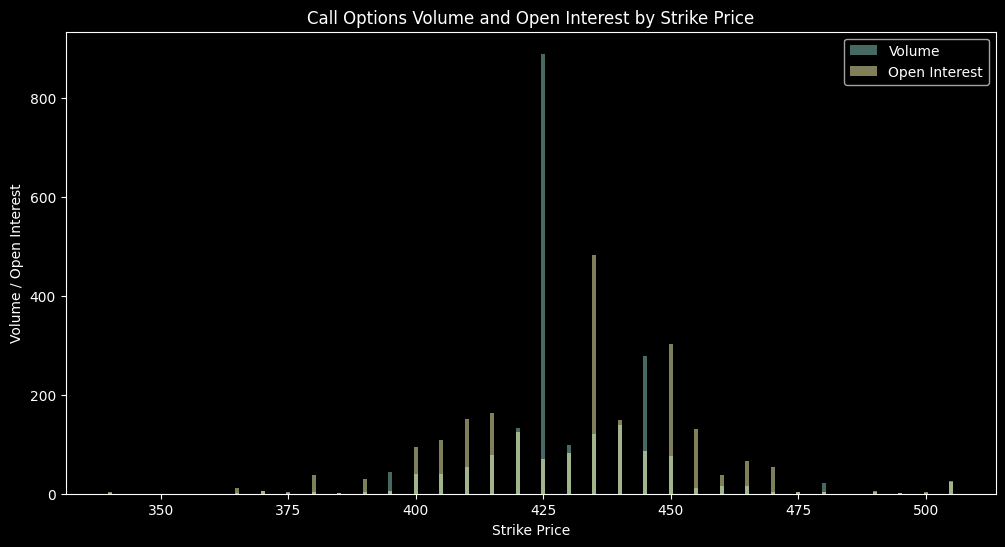

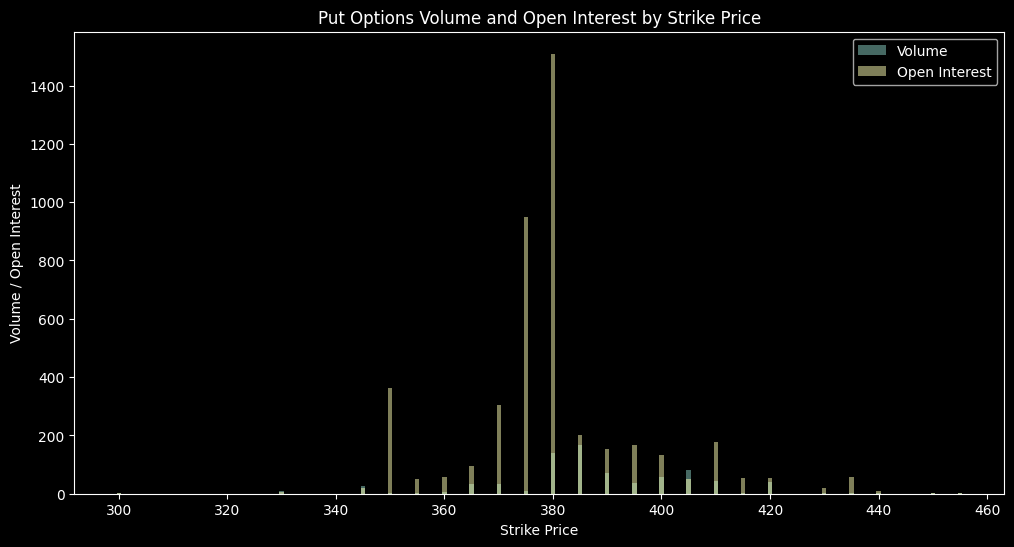

In [7]:
# Plot Volume and Open Interest for Calls
plt.figure()
plt.bar(calls['strike'], calls['volume'], alpha=0.5, label='Volume')
plt.bar(calls['strike'], calls['openInterest'], alpha=0.5, label='Open Interest')
plt.xlabel('Strike Price')
plt.ylabel('Volume / Open Interest')
plt.title('Call Options Volume and Open Interest by Strike Price')
plt.legend()
plt.show()

# Plot Volume and Open Interest for Puts
plt.figure()
plt.bar(puts['strike'], puts['volume'], alpha=0.5, label='Volume')
plt.bar(puts['strike'], puts['openInterest'], alpha=0.5, label='Open Interest')
plt.xlabel('Strike Price')
plt.ylabel('Volume / Open Interest')
plt.title('Put Options Volume and Open Interest by Strike Price')
plt.legend()
plt.show()

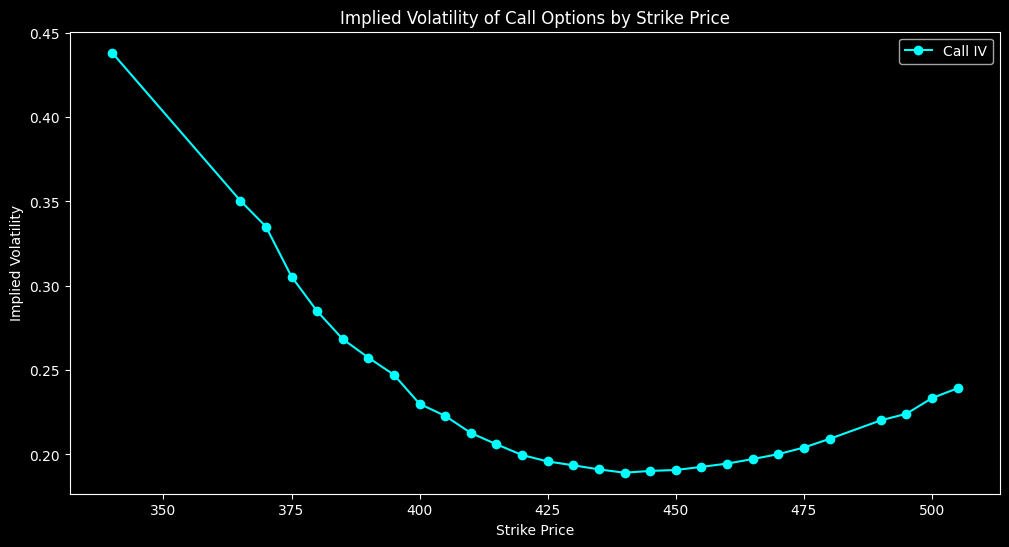

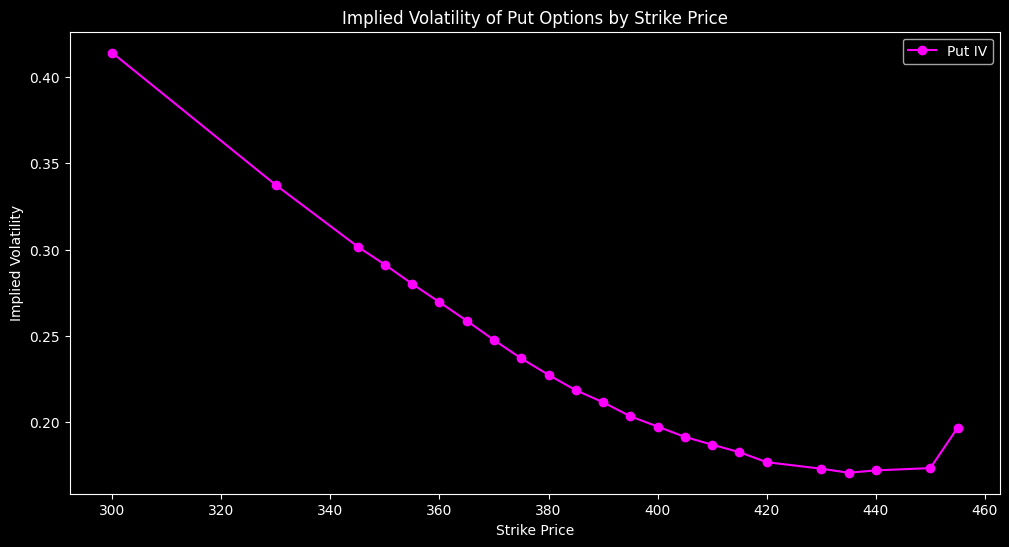

In [8]:
# Implied Volatility vs. Strike Price for Calls
plt.figure()
plt.plot(calls['strike'], calls['impliedVolatility'], marker='o', linestyle='-', color='cyan', label='Call IV')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility of Call Options by Strike Price')
plt.legend()
plt.show()

# Implied Volatility vs. Strike Price for Puts
plt.figure()
plt.plot(puts['strike'], puts['impliedVolatility'], marker='o', linestyle='-', color='magenta', label='Put IV')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility of Put Options by Strike Price')
plt.legend()
plt.show()

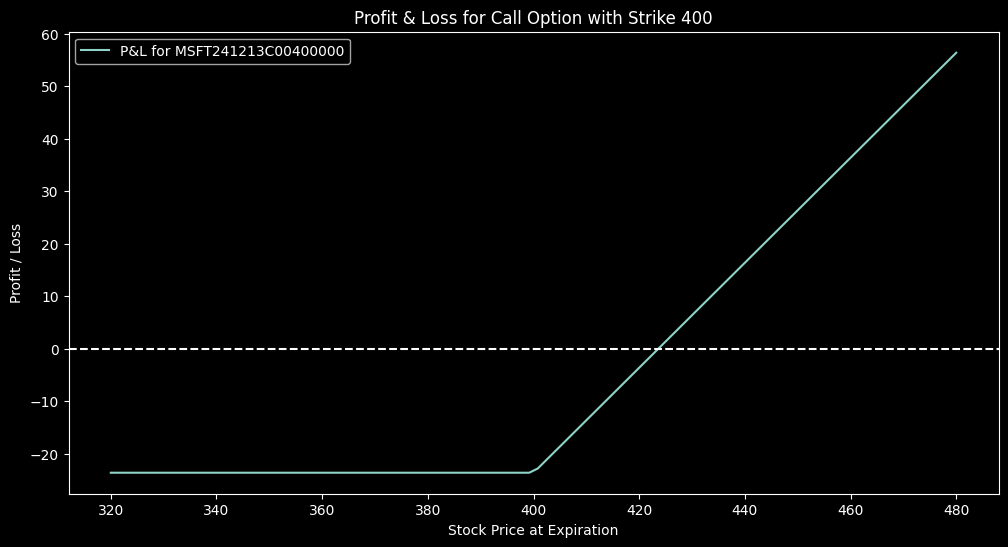

In [9]:
# Define a sample option for P&L analysis
sample_strike = 400  # example strike price
sample_option = calls[calls['strike'] == sample_strike].iloc[0]
premium_paid = sample_option['lastPrice']

# Set up stock price range for P&L calculation
stock_prices = np.linspace(sample_strike * 0.8, sample_strike * 1.2, 100)
pnl = np.maximum(stock_prices - sample_strike, 0) - premium_paid  # P&L formula for call

# Plot P&L
plt.figure()
plt.plot(stock_prices, pnl, label=f'P&L for {sample_option["contractSymbol"]}')
plt.axhline(0, color='white', linestyle='--')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit / Loss')
plt.title(f'Profit & Loss for Call Option with Strike {sample_strike}')
plt.legend()
plt.show()

In [11]:
# Convert expiration_date to a timezone-naive datetime
expiration_date = datetime.strptime('2024-12-13', '%Y-%m-%d')

# Ensure lastTradeDate column is timezone-naive
calls['lastTradeDate'] = calls['lastTradeDate'].dt.tz_localize(None)
puts['lastTradeDate'] = puts['lastTradeDate'].dt.tz_localize(None)

# Now you can calculate time to expiration
calls['timeToExpiration'] = (expiration_date - calls['lastTradeDate']).dt.days / 365
puts['timeToExpiration'] = (expiration_date - puts['lastTradeDate']).dt.days / 365

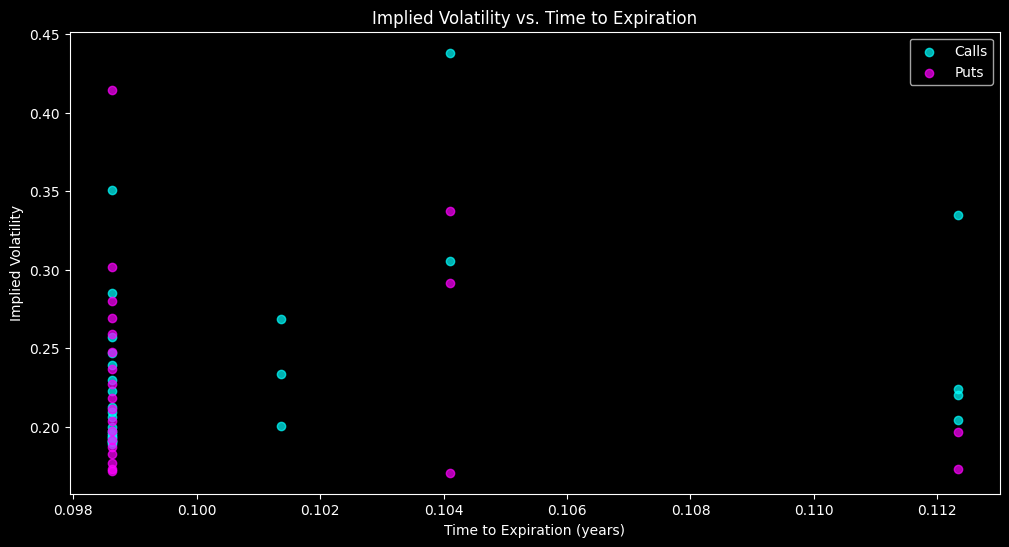

In [12]:
# Calculate time-to-expiration in years
expiration_date = datetime.strptime('2024-12-13', '%Y-%m-%d')
calls['timeToExpiration'] = (expiration_date - calls['lastTradeDate']).dt.days / 365
puts['timeToExpiration'] = (expiration_date - puts['lastTradeDate']).dt.days / 365

# Plot Implied Volatility vs. Time to Expiration
plt.figure()
plt.scatter(calls['timeToExpiration'], calls['impliedVolatility'], alpha=0.7, label='Calls', color='cyan')
plt.scatter(puts['timeToExpiration'], puts['impliedVolatility'], alpha=0.7, label='Puts', color='magenta')
plt.xlabel('Time to Expiration (years)')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Time to Expiration')
plt.legend()
plt.show()

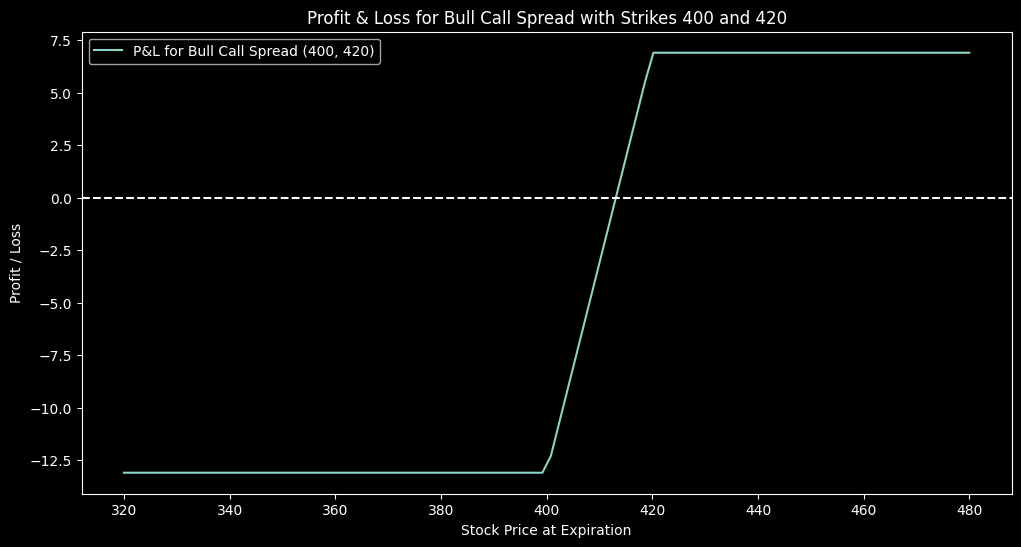

In [13]:
# Example: Bull Call Spread
lower_strike = 400
higher_strike = 420
lower_option = calls[calls['strike'] == lower_strike].iloc[0]
higher_option = calls[calls['strike'] == higher_strike].iloc[0]

premium_paid = lower_option['lastPrice'] - higher_option['lastPrice']

# Calculate P&L for Bull Call Spread
pnl_spread = np.maximum(stock_prices - lower_strike, 0) - np.maximum(stock_prices - higher_strike, 0) - premium_paid

# Plot
plt.figure()
plt.plot(stock_prices, pnl_spread, label=f'P&L for Bull Call Spread ({lower_strike}, {higher_strike})')
plt.axhline(0, color='white', linestyle='--')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit / Loss')
plt.title(f'Profit & Loss for Bull Call Spread with Strikes {lower_strike} and {higher_strike}')
plt.legend()
plt.show()

Put-Call Volume Ratio: 0.37
Put-Call Open Interest Ratio: 1.98


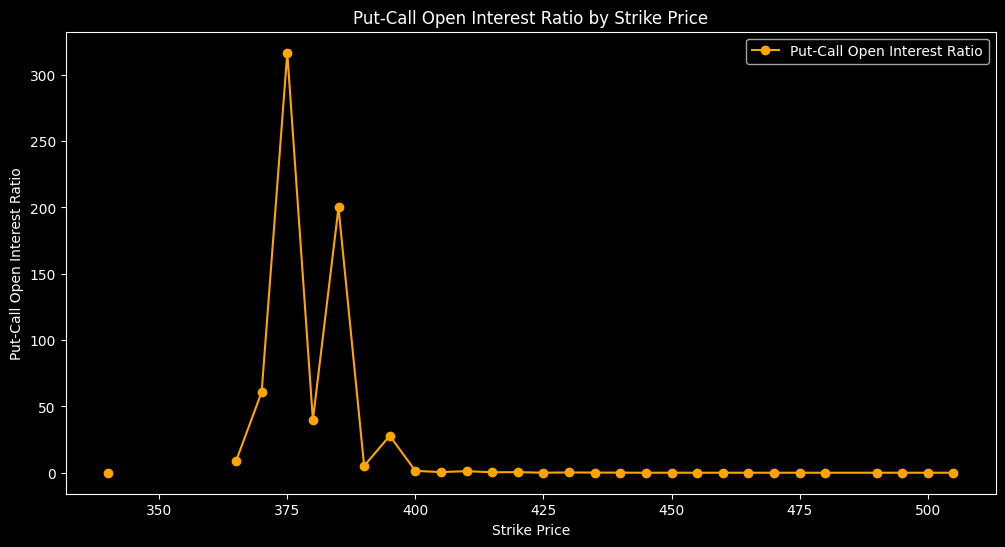

In [14]:
# Calculate Put-Call Ratios
put_call_volume_ratio = puts['volume'].sum() / calls['volume'].sum()
put_call_open_interest_ratio = puts['openInterest'].sum() / calls['openInterest'].sum()

# Display the ratios
print(f"Put-Call Volume Ratio: {put_call_volume_ratio:.2f}")
print(f"Put-Call Open Interest Ratio: {put_call_open_interest_ratio:.2f}")

# Plot the Put-Call Open Interest Ratio across strikes
strikes = sorted(set(calls['strike']).union(set(puts['strike'])))
call_open_interest = calls.set_index('strike').reindex(strikes)['openInterest'].fillna(0)
put_open_interest = puts.set_index('strike').reindex(strikes)['openInterest'].fillna(0)
put_call_open_interest_by_strike = put_open_interest / call_open_interest.replace(0, np.nan)  # Avoid division by zero

plt.figure()
plt.plot(strikes, put_call_open_interest_by_strike, marker='o', color='orange', label='Put-Call Open Interest Ratio')
plt.xlabel('Strike Price')
plt.ylabel('Put-Call Open Interest Ratio')
plt.title('Put-Call Open Interest Ratio by Strike Price')
plt.legend()
plt.show()